# **The Sparks Foundation-GRIP June 2021**
## **TASK1 - PREDICTION USING UNSUPERVISED ML**
## **Author: K.Sarveshwaran**

## **Importing libraries**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn import datasets
%matplotlib inline

## **IMPORTING DATASET**

In [80]:
# Loading the iris dataset
iris=datasets.load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## CREATING THE DATA FRAME

In [81]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
target_df=pd.DataFrame(iris.target,columns=['target'])

## **EXPLORATORY DATA ANALYSIS**

In [63]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [64]:
target_df.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [65]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [66]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [67]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
df.duplicated().sum()

1

In [3]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## **Plotting the data before clustering**

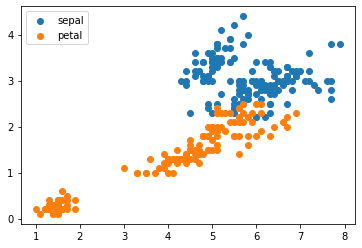

In [4]:
#plotting the scatter plot
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],label='sepal')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],label='petal')
plt.legend()

## **Finding the optimum number of clusters for k-means classification**

In [5]:
from sklearn.cluster import KMeans
k=range(1,10)
wcss=[]
for i in k:
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
    
    


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384]

## **ELBOW METHOD**

Text(0.5, 1.0, 'ELBOW METHOD')

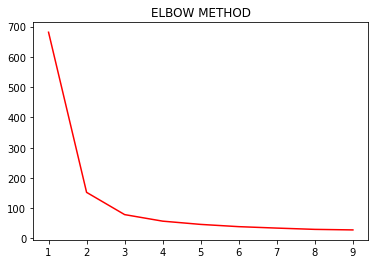

In [7]:
#Plotting the elbow curve
plt.plot(k,wcss,c='red')
plt.title('ELBOW METHOD')

### We can clearly see that there is a negative relationship between no.of clusters and sum of squared errors,if no.of.clusters increases sum of squared error decreases.
### From this above elbow method, we can assume our k value to be 3.

## Creating the KMeans classifier

In [43]:
km=KMeans(n_clusters=3,init='k-means++',random_state=0)
y=km.fit_predict(df)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Centroids

In [45]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [47]:
#Adding a new column to the dataframe
df['cluster']=y

In [59]:
#splitting the clusters 
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

## **VISUALIZING THE CLUSTERS**

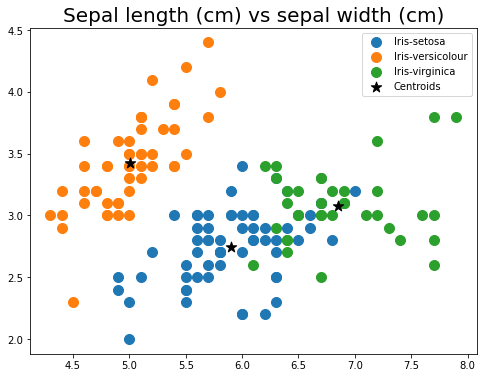

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],label='Iris-setosa',s=100)
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],label='Iris-versicolour',s=100)
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],label='Iris-virginica',s=100)
plt.title('Sepal length (cm) vs sepal width (cm)',size=20)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=120,label='Centroids',c='black',marker='*')
plt.legend()

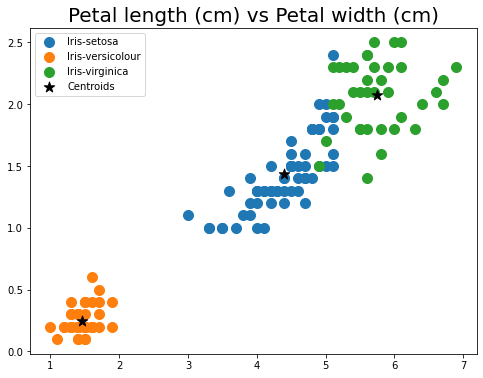

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='Iris-setosa',s=100)
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],label='Iris-versicolour',s=100)
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],label='Iris-virginica',s=100)
plt.title('Petal length (cm) vs Petal width (cm)',size=20)
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],s=120,label='Centroids',c='black',marker='*')
plt.legend()

## **CONCLUSION:**
### **1) The optimum no of clusters are 3.**
### **2) We have visualized the scatter plot for sepal length vs sepal width and petal length vs petal width.**